# Telco Churn Predictions

### Question: Why are customers churning? 

### Goals: Predict which customers are going to churn and what features are causing churn.
(Baseline of 60% churn***)

### Additional questons:
- Could the month in which they sign up influence churn?
- If a cohort(s) is identified by tenure, is there a cohort who has a higher rate of churn than others?
- Are there features that indicate a higher rate of churn?
- Is there a price threshhold for specific services where likihood of churn increases once customers get past that point? What is that price point and for what services?
- Are the rates comparable for customers who have month-to-month contracts at the 12-month mark vs the customers who have 1-year contracts at their 12-month mark?

### Data Dictionary
(Alphabetical Order)

- Choices made and why
- what columns mean
- combined columns and why
- dropped columns and why
- changed dtypes

**Churn:** whether or not a customer has defected; represented as 0 == churn, 1 == not churned 

**Contract Type:** type of contract a person has, represented as month-to-month, one year, two year. I will drop this column in the prepare stage since it is a duplicate of contract type id. I brought it in originally with the data in order to explore the entire dataset. 

**Contract Type ID:** type of contract a customer has; represented as 1 == month-to-month, 2 == 1 year, 3 == 2 year

**Customer ID:** unique identifier for each customer, represented with 10 characters

**Dependents:** whether a customer has any dependents or not, represented as 0 == no dependents, 1 == dependents 

**Family:**

**Gender:** whether a customer is male or female, represented as 0 == male, 1 == female

**Internet Service Type:** type of internet service a person has, represented as DSL, Fiber Optic, None. I will drop this column in the prepare stage since it is a duplicate of internet service type id. I brought it in originally with the data in order to explore the entire dataset.

**Internet Service Type ID:** type of internet service a customer has, represented as 1 == DSL, 2 == Fiber Optic, 3 == None

**Monthly Charges:** amount of charges per month

**Paperless Billing:** whether a customer has paperless billing or not, represented as 0 == inactive paperless billing, 1 == active paperless billing

**Partner:** whether a customer has a partner or not, represented as 0 == no partner, 1 == has partner 

**Payment Type:** type of payment setup for a customer represented as Electronic Check, Mail Check, Bank Transfer (auto), Credit Card (auto). I will drop this column because it is a duplicate of payment type id. I brought it in originally with the data in order to explore the entire dataset.

**Payment Type ID:** type of payment setup for a customer represented as 1 == Electronic Check, 2 == Mail Check, 3 == Bank Transfer (auto), 4 == Credit Card (auto)

**Phone Service:** whether a customer has phone service or not, represented as 0 == no phone service, 1 == has phone service 

**Senior Citizen:** whether a customer is a senior or not, represented as 0 == not a senior citizen, 1 == senior citizen

**Streaming Movies:** whether a customer has streaming movies service or not, represented as 0 == not having movie streaming services, 1 == having movie streaming services 

**Streaming Services:**

**Streaming TV:** whether a customer has streaming tv service or not, represented as 0 == not having tv streaming services, 1 == has tv streaming services

**Tech Supoort:**  whether a customer has tech support or not, represented as 0 == not having tech support, 1 == has tech support

**Tenure:** number of months a customer was/or continues to be a customer

**Total Charges:** amount of charges over full tenure as customer

## Baseline Model

### Imports
- Import all the neccessary libraries needed to create models that will predict churn.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier

from util import get_db_url
import acquire
import prepare
import split_scale
import feature_selection

- I will use the acquire.py file to get the data. I will look through the data in this notebook and clean up anything that I feel needs to be cleande up: fill or drop null values, change data types, etc.

**Tasks: check for nulls, look at dtypes, handle customer_id column.**

In [3]:
df = acquire.acquire_telco()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,tenure,phone_service,multiple_lines,online_security,...,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,family,streaming_services
0,2,1,1,0003-MKNFE,Male,0,9,Yes,Yes,No,...,No,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,False,True
1,4,1,1,0013-MHZWF,Female,0,9,Yes,No,No,...,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic),True,True
2,1,1,1,0015-UOCOJ,Female,1,7,Yes,No,Yes,...,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check,False,False
3,1,1,1,0023-HGHWL,Male,1,1,No,No phone service,No,...,No,Yes,25.1,25.10,Yes,Month-to-month,DSL,Electronic check,False,False
4,3,1,1,0032-PGELS,Female,0,1,No,No phone service,Yes,...,No,No,30.5,30.50,Yes,Month-to-month,DSL,Bank transfer (automatic),True,False


In [4]:
df.shape

(7032, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
payment_type_id             7032 non-null int64
internet_service_type_id    7032 non-null int64
contract_type_id            7032 non-null int64
customer_id                 7032 non-null object
gender                      7032 non-null object
senior_citizen              7032 non-null int64
tenure                      7032 non-null int64
phone_service               7032 non-null object
multiple_lines              7032 non-null object
online_security             7032 non-null object
online_backup               7032 non-null object
device_protection           7032 non-null object
tech_support                7032 non-null object
paperless_billing           7032 non-null object
monthly_charges             7032 non-null float64
total_charges               7032 non-null float64
churn                       7032 non-null object
contract_type               7032 non-null object
internet_servi

**From looking at this table:**
- Change total_charges column into float.
- Change churn column into numeric values to run through a model.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7032.0,2.315557,1.149523,1.00,1.0000,2.000,3.0000,4.00
internet_service_type_id,7032.0,1.872582,0.737271,1.00,1.0000,2.000,2.0000,3.00
contract_type_id,7032.0,1.688567,0.832934,1.00,1.0000,1.000,2.0000,3.00
senior_citizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
total_charges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


- Check the data for any null values using .value_counts().

In [7]:
df.churn.value_counts()

No     5163
Yes    1869
Name: churn, dtype: int64

In [8]:
df.monthly_charges.value_counts()
df.monthly_charges.isnull().sum()

0

- Looking at the .value_counts() for total charges, I saw that there were 11 null values, so I went in and took care of those empty values by turning them into np.nan's, then double checked the work.

In [9]:
df.total_charges.value_counts()
df.total_charges.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.total_charges.value_counts(dropna=False)

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
19.55       7
45.30       7
20.15       6
20.25       6
19.45       6
20.45       5
20.30       5
69.65       4
69.90       4
19.40       4
70.60       4
20.50       4
20.40       4
19.50       4
49.90       4
69.95       4
19.95       4
19.30       4
75.30       4
44.00       4
19.20       4
19.85       4
74.70       4
50.15       4
69.60       4
           ..
1834.15     1
999.80      1
8333.95     1
7171.70     1
3726.15     1
80.05       1
456.85      1
96.05       1
1399.35     1
2497.35     1
7069.30     1
688.65      1
6471.85     1
552.10      1
3242.50     1
3252.00     1
183.75      1
6886.25     1
7108.20     1
78.45       1
1171.30     1
3181.80     1
2540.10     1
3580.95     1
6470.10     1
3143.65     1
1110.50     1
1098.85     1
156.10      1
30.50       1
Name: total_charges, Length: 6530, dtype: int64

- Since there were only 11 np.nan values in the total charges, I opted to just drop the 11 rows from the dataframe, since I am working with over 7,000 rows.

In [10]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
payment_type_id             7032 non-null int64
internet_service_type_id    7032 non-null int64
contract_type_id            7032 non-null int64
customer_id                 7032 non-null object
gender                      7032 non-null object
senior_citizen              7032 non-null int64
tenure                      7032 non-null int64
phone_service               7032 non-null object
multiple_lines              7032 non-null object
online_security             7032 non-null object
online_backup               7032 non-null object
device_protection           7032 non-null object
tech_support                7032 non-null object
paperless_billing           7032 non-null object
monthly_charges             7032 non-null float64
total_charges               7032 non-null float64
churn                       7032 non-null object
contract_type               7032 non-null object
internet_servi

- I will now change the total_charges from an object to a float, since it is money.

In [11]:
df.total_charges.dtype
df['total_charges'] = df['total_charges'].astype(float)
df.total_charges.dtype

dtype('float64')

- After evaluating the partner and dependents columns during my first explanatory analysis, I decided to backtrack and create one column from the two, 'family'. I will also create one column, 'streaming services', from streaming tv and streaming movies. I decided to create these new combined features because neither had a lot of correlation with churn and they are similar in context.

In [13]:
df['family'] = (df.partner == 'Yes') | (df.dependents == 'Yes')
df['streaming_services'] = (df.streaming_movies == 'Yes') | (df.streaming_tv == 'Yes')
df.drop(columns=['partner', 'dependents', 'streaming_tv', 'streaming_movies'], inplace=True)

Function to get prepared data.

## Baseline Model: Decision Tree

- After preparing the data, I will create a new baseline dataframe and pick random numeric features to create a baseline model to predict churn. In order to do this, I need need to encode my churn column into 0's and 1's to depict either churned or not churned.

**Task: Encode churn column.**

In [12]:
df_base = df
df_base.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,tenure,phone_service,multiple_lines,online_security,...,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,family,streaming_services
0,2,1,1,0003-MKNFE,Male,0,9,Yes,Yes,No,...,No,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,False,True
1,4,1,1,0013-MHZWF,Female,0,9,Yes,No,No,...,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic),True,True
2,1,1,1,0015-UOCOJ,Female,1,7,Yes,No,Yes,...,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check,False,False
3,1,1,1,0023-HGHWL,Male,1,1,No,No phone service,No,...,No,Yes,25.1,25.10,Yes,Month-to-month,DSL,Electronic check,False,False
4,3,1,1,0032-PGELS,Female,0,1,No,No phone service,Yes,...,No,No,30.5,30.50,Yes,Month-to-month,DSL,Bank transfer (automatic),True,False


In [13]:
base_encoder = LabelEncoder()
df_base.churn = base_encoder.fit_transform(df_base.churn)
df_base.churn.head()

0    0
1    0
2    0
3    1
4    1
Name: churn, dtype: int64

- The dtype for the churn column has now been changed from object to an integer.

In [14]:
df_base.churn.dtype

dtype('int64')

- I will define what columns I want to be my features (X) and churn as my target (y).

In [15]:
X = df_base[['tenure', 'monthly_charges', 'total_charges']]
y = df_base[['churn']]

- I will split the data into train and test, and then run the data through a decision tree model to create a baseline model.
- After I plug the data into the model, I will look at the predicted churn values, and the probabilities of the customer either churning or not churning.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=123)

In [17]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [18]:
y_pred = clf.predict(X_train)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [19]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba

array([[0.36346516, 0.63653484],
       [0.91964286, 0.08035714],
       [0.87067395, 0.12932605],
       ...,
       [0.87067395, 0.12932605],
       [0.63268156, 0.36731844],
       [0.36346516, 0.63653484]])

#### Evaluate the Baseline Model

In [20]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [21]:
confusion_matrix(y_train, y_pred)

array([[3298,  327],
       [ 684,  613]])

In [22]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3625
           1       0.65      0.47      0.55      1297

    accuracy                           0.79      4922
   macro avg       0.74      0.69      0.71      4922
weighted avg       0.78      0.79      0.78      4922



In [23]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.79


### Takeaways:
- The accuracy score for the data chosen to run through this model is 84%. This baseline is better than the firt baseline, 60%.

**Tasks: Create a new model with more/different features, encoded data and scaled data.**

## Baseline Model 2: Encoded Decision Tree

- I will create a new dataframe with the cleaned up data and then encode the dtypes that are objects to turn them into numeric values to have more features to run through a model. I will set the customer id column as the index, to move it to the side, but keep it for reference.

**Task: Encode features run through a new model.**

In [24]:
df_telco = df
df_telco.set_index('customer_id', inplace=True)
df_telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,family,streaming_services
customer_id,,,,,,,,,,,,,,,,,,,,,
0003-MKNFE,2,1,1,Male,0,9,Yes,Yes,No,No,...,No,No,59.9,542.40,0,Month-to-month,DSL,Mailed check,False,True
0013-MHZWF,4,1,1,Female,0,9,Yes,No,No,No,...,Yes,Yes,69.4,571.45,0,Month-to-month,DSL,Credit card (automatic),True,True
0015-UOCOJ,1,1,1,Female,1,7,Yes,No,Yes,No,...,No,Yes,48.2,340.35,0,Month-to-month,DSL,Electronic check,False,False
0023-HGHWL,1,1,1,Male,1,1,No,No phone service,No,No,...,No,Yes,25.1,25.10,1,Month-to-month,DSL,Electronic check,False,False
0032-PGELS,3,1,1,Female,0,1,No,No phone service,Yes,No,...,No,No,30.5,30.50,1,Month-to-month,DSL,Bank transfer (automatic),True,False


- I will encode all columns that make sense for me to change with a Label Encoder in order to run more features through a model.
- I will also drop the columns contract typem internet service type and payment type, since they are repeats of the type id columns.

**Task: Establish what each number corresponds to after encoding the columns.**

In [25]:
train, test = train_test_split(df, train_size=.7, random_state=123)
print('Train data shape:', train.shape)
print('Test data shape:', test.shape)

Train data shape: (4922, 21)
Test data shape: (2110, 21)


In [26]:
def encode(train, test):
    encoder = LabelEncoder()
    train = train.drop(columns=['contract_type', 'internet_service_type','payment_type'])
    test = test.drop(columns=['contract_type', 'internet_service_type', 'payment_type'])
    encode_list = ['gender', 'phone_service','multiple_lines', 'online_security', 'online_backup','device_protection','tech_support', \
                'paperless_billing', 'churn', 'family', 'streaming_services']
    for c in encode_list:
        train[c] = encoder.fit_transform(train[c])
        test[c] = encoder.transform(test[c])
    return train, test

In [27]:
train_encode, test_encode = encode(train, test)
train_encode.head()

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,paperless_billing,monthly_charges,total_charges,churn,family,streaming_services
customer_id,,,,,,,,,,,,,,,,,,
3866-MDTUB,1,1,1,0,0,2,1,0,2,0,0,0,1,70.75,146.90,1,0,1
5555-RNPGT,4,3,1,1,0,10,1,2,1,1,1,1,0,24.80,223.90,0,1,0
3727-OWVYD,2,1,2,1,0,35,1,0,2,2,2,0,0,61.20,2021.20,0,0,0
2270-CHBFN,4,2,1,0,0,44,1,2,2,2,2,2,1,95.10,4060.55,0,1,0
6892-XPFPU,1,2,1,1,1,24,1,2,0,2,2,0,1,104.25,2433.90,1,1,1


In [28]:
X = train_encode.drop(['churn'],axis=1)
y = train_encode[['churn']]
X_test = test_encode.drop(['churn'],axis=1)
y_test = test_encode[['churn']]

In [59]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=123)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [60]:
y_pred = clf.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
y_pred_proba = clf.predict_proba(X)
y_pred_proba

array([[0.82075472, 0.17924528],
       [0.82075472, 0.17924528],
       [0.95263158, 0.04736842],
       ...,
       [0.95263158, 0.04736842],
       [0.82075472, 0.17924528],
       [0.51969504, 0.48030496]])

#### Evaluate Baseline Model 2

In [62]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X, y)))

Accuracy of Decision Tree classifier on training set: 0.79


In [63]:
print(confusion_matrix(y, y_pred))

[[3368  257]
 [ 775  522]]


In [64]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3625
           1       0.67      0.40      0.50      1297

    accuracy                           0.79      4922
   macro avg       0.74      0.67      0.69      4922
weighted avg       0.78      0.79      0.77      4922



In [65]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.77


### Takeaways:
- The accuracy of this model is extremely similar to the the accuracy of the first baseline model I ran, with only three features. I will continue with this baseline model 2 moving forward in order to work with more features.

## Exploratory Analysis

- Using the encoded data, I will now look at the correlation between all features to then find the best features to use in my predictive model.

- I will begin by looking at the distribution of churn.

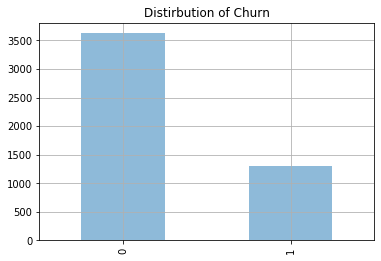

In [36]:
y.churn.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Distirbution of Churn")
plt.grid(b = True , which = "major")

- Takeaway: Significantly less people have churned (1) vs. people who have not churned (0).

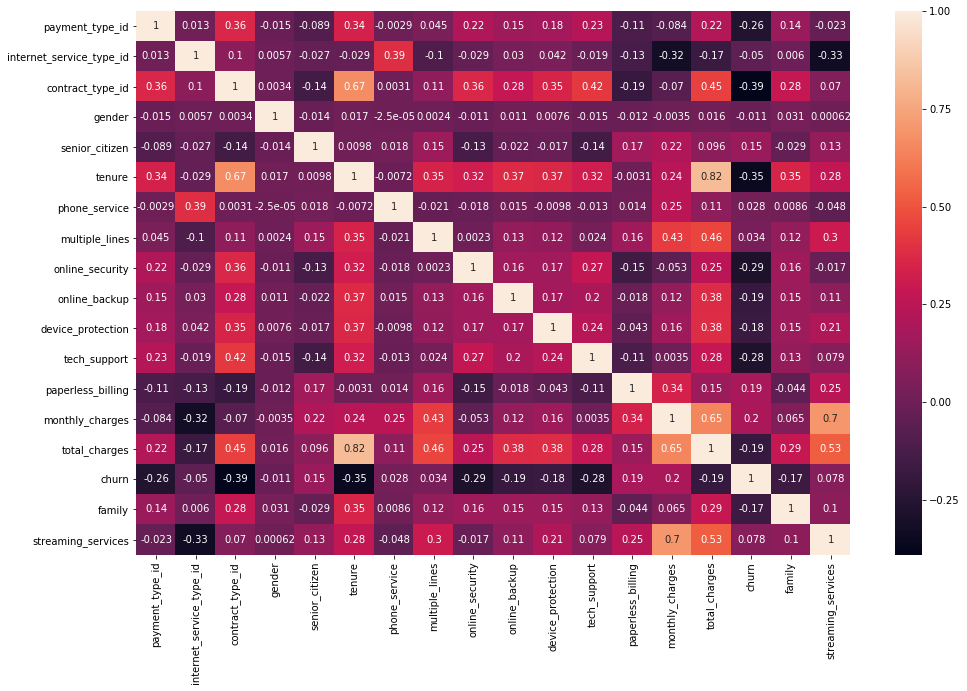

In [37]:
plt.figure(figsize=(16,10))
sns.heatmap(train_encode.corr(), annot=True)

- Takeaway: This heatmap allows me to get a better idea of how features are correlated to each other.
- total charges and tenure
- tenure and contract id type
- monthly charges and total charges

#### Question 1: Could the month in which they sign up influence churn?

In [14]:
pd.crosstab(y.churn, X.tenure, margins=True).style.background_gradient(cmap='YlOrRd')

NameError: name 'y' is not defined

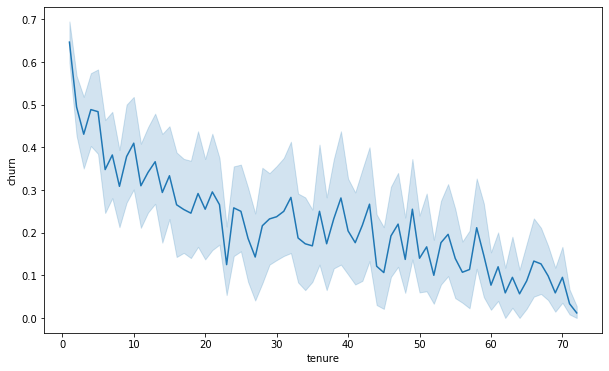

In [39]:
plt.figure(figsize=(10,6))
sns.lineplot(x='tenure', y='churn', data=train_encode)

Takeaway: The longer a customer's tenure, the less likely they churn. This is probably due to different contract types. I will now look into this to get a better sense of contract type compared to churn rate.

#### Question 2: If a cohort(s) is identified by tenure, is there a cohort who has a higher rate of churn than others?

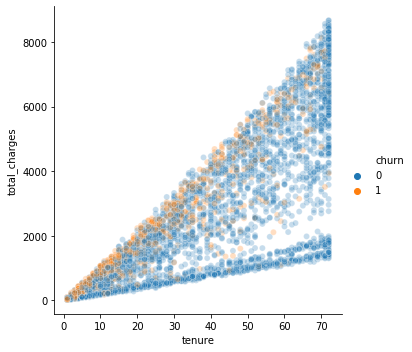

In [40]:
sns.relplot(x='tenure', y='total_charges', hue='churn', data=train_encode, alpha=.25)

Takeaway: You can see from this chart that more people tend to churn when their tenure is less than those with a larger tenure. This can be due to many different variables. I will look at more features independently to see if there is a correlation for those who have churned.

In [41]:
features = ['dependents', 'partner']

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

churn_rate = train_encode.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train_encode, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

Melt these columns, partner and dependents, into one column, since they are extremely similar.

#### Question 3: Are there features that indicate a higher rate of churn?

#### Question 4: Is there a price threshhold for specific services where likihood of churn increase once customers get past that point? What is that price point and for what services?

#### Question 5: Are the rates comparable for customers who have month-to-month contracts ath their 12-month mark vs. the customers who have a 1-year contract at their 12-month mark?

## MVP Model: Logistic Regression

- Use SelectKBest to select the best features to use in my model to predict churn.

In [82]:
f_selector = SelectKBest(f_regression, k=5)

f_selector.fit(X, y)

f_support = f_selector.get_support()
f_feature = X.loc[:,f_support].columns.tolist()

print(str(len(f_feature)), 'selected features')
print(f_feature)

5 selected features
['payment_type_id', 'contract_type_id', 'tenure', 'online_security', 'tech_support']


In [83]:
X_kbest = train_encode[['payment_type_id', 'contract_type_id', 'tenure', 'online_security', 'tech_support']]
y_kbest = train_encode[['churn']]
X_kbtest = test_encode[['payment_type_id', 'contract_type_id', 'tenure', 'online_security', 'tech_support']]
y_kbtest = test_encode[['churn']]

In [84]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)
clf.fit(X_kbest, y_kbest)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [85]:
y_pred = clf.predict(X_kbest)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
y_pred_proba = clf.predict_proba(X_kbest)
y_pred_proba

array([[0.61403509, 0.38596491],
       [0.86466165, 0.13533835],
       [0.88219895, 0.11780105],
       ...,
       [0.88219895, 0.11780105],
       [0.77464789, 0.22535211],
       [0.51337793, 0.48662207]])

Evaluate the model

In [87]:
format(clf.score(X_kbest, y_kbest))

'0.785453067858594'

In [88]:
print(classification_report(y_kbest, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      3625
           1       0.67      0.37      0.48      1297

    accuracy                           0.79      4922
   macro avg       0.74      0.65      0.67      4922
weighted avg       0.77      0.79      0.76      4922



### Random Forest

In [89]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=10,
                            max_depth=3, 
                            random_state=123)

In [90]:
rf.fit(X_kbest, y_kbest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [91]:
print(rf.feature_importances_)

[0.04160806 0.36834372 0.26745674 0.12601677 0.1965747 ]


In [92]:
y_pred = rf.predict(X_kbest)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [93]:
y_pred_proba = rf.predict_proba(X_kbest)
y_pred_proba

array([[0.52208437, 0.47791563],
       [0.78751481, 0.21248519],
       [0.88879184, 0.11120816],
       ...,
       [0.9467564 , 0.0532436 ],
       [0.65036545, 0.34963455],
       [0.45480805, 0.54519195]])

In [94]:
format(rf.score(X_kbest, y_kbest))

'0.7893132872815929'

In [95]:
print(classification_report(y_kbest, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3625
           1       0.66      0.41      0.51      1297

    accuracy                           0.79      4922
   macro avg       0.74      0.67      0.69      4922
weighted avg       0.77      0.79      0.77      4922



### Random Forest with All Features

In [104]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [105]:
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [106]:
print(rf.feature_importances_)

[5.30215503e-02 3.91552660e-02 2.72266595e-01 0.00000000e+00
 1.00578423e-04 1.41018763e-01 3.30695801e-05 7.28924539e-04
 1.43633746e-01 3.18300566e-02 2.66078150e-02 1.47093728e-01
 1.09113389e-02 4.42741624e-02 8.16678711e-02 4.66756899e-03
 2.98896700e-03]


In [107]:
y_pred = rf.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [108]:
y_pred_proba = rf.predict_proba(X)
y_pred_proba

array([[0.54836822, 0.45163178],
       [0.84683168, 0.15316832],
       [0.89147952, 0.10852048],
       ...,
       [0.91893359, 0.08106641],
       [0.65776308, 0.34223692],
       [0.48785617, 0.51214383]])

In [109]:
format(rf.score(X, y))

'0.7947988622511174'

In [110]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      3625
           1       0.72      0.36      0.48      1297

    accuracy                           0.79      4922
   macro avg       0.76      0.66      0.68      4922
weighted avg       0.78      0.79      0.77      4922

